In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
weather_data = pd.read_csv("weather.csv")
weather_data
Incidence_data=pd.read_csv("_cleaned_incidence_rate.csv")
Incidence_data
Temp_data=pd.read_csv("temperature.csv")
Temp_data
Incidence_data1=Incidence_data.groupby(['cause_name']).sum()/1000
Incidence_data1.reset_index(inplace=True)
Incidence_data1
total=Incidence_data1['val'].sum()/1000
total

Incidence_data1['Percentage']=Incidence_data1['val']/total
Incidence_data1

Incidence_data1 = Incidence_data1.sort_values(["Percentage"], ascending=False).head(5)
Incidence_data1.head()
#Incidence_data1=Incidence_data1.style.format({'Percentage': '{:,.2%}'.format})
#Incidence_data1


,cause_name,val,Percentage
16,Mental disorders,9150.959123,303.680570
11,Depressive disorders,7714.854291,256.022491
15,Major depressive disorder,7223.581517,239.719282
20,Substance use disorders,1797.578912,59.653833
0,Alcohol use disorders,1509.443435,50.091869


([<matplotlib.patches.Wedge at 0x1209469b0>,
 [Text(-0.6941522538006104, -0.9788527205578648, 'Mental'),
  Text(1.0001204181710834, -0.45799470428957756, 'Depressive'),
  Text(0.4714555302448273, 0.99384590505851, 'Major depressive'),
  Text(-0.5249191826885281, 0.9666746358757986, 'Substance use'),
  Text(-0.8206770314345793, 0.73245423753005, 'Alcohol use'),
  Text(-1.0554217158060806, 0.30997580841889705, 'Other')],
 [Text(-0.40492214805035603, -0.570997420325421, '30.4%'),
  Text(0.5455202280933181, -0.24981529324886045, '25.6%'),
  Text(0.25715756195172396, 0.5420977663955509, '24.0%'),
  Text(-0.2863195541937426, 0.5272770741140719, '6.0%'),
  Text(-0.4476420171461341, 0.39952049319820904, '5.0%'),
  Text(-0.5756845722578621, 0.16907771368303473, '9.1%')])

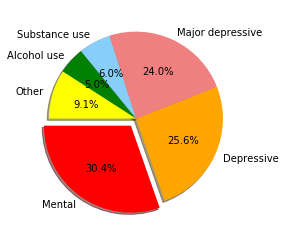

In [3]:
# Labels for the sections of our pie chart
labels = ["Mental", "Depressive", "Major depressive", "Substance use","Alcohol use","Other"]

# The values of each section of the pie chart
sizes = [9150, 7714, 7223, 1797,1509,2740]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue","green","yellow"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0, 0,0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)

In [4]:
Incidence_data2=Incidence_data.groupby(['location_name','cause_name']).sum()
Incidence_data2.reset_index(inplace=True)
Incidence_data2
Incidence_data2.columns
Incidence_data2.cause_name.unique()
Incidence_data_list=['Depressive disorders','Major depressive disorder']
Incidence_sv=Incidence_data2[Incidence_data2.cause_name.isin(Incidence_data_list)]
Incidence_sv
Incidence_data3=Incidence_sv.groupby(['location_name']).sum()
Incidence_data3
Incidence_data3.reset_index(inplace=True)
Incidence_data4=Incidence_data3.rename(columns={'location_name': 'State','val':'Incidence rate'})
Incidence_data4.head()


,State,Incidence rate
0,Alabama,285260.918814
1,Alaska,306732.419234
2,Arizona,320307.295471
3,Arkansas,334072.647169
4,California,257912.412447


In [8]:
rainfall_depression_data=pd.merge(weather_data,Incidence_data4,on='State')
rainfall_depression_data.head()
rainfall_temp_depression_data=pd.merge(rainfall_depression_data,Temp_data,on='State')
rainfall_temp_depression_data.head()
rainfall_temp_depression=rainfall_temp_depression_data.rename(columns={'Avg °F': 'temperature'})
rainfall_temp_depression.head()


,State,Inches,metres,Rank,Incidence rate,temperature,Avg °C,Rank
0,Alabama,58.3,1480,4,285260.918814,62.8,17.1,7
1,Alaska,22.5,572,39,306732.419234,26.6,-3.0,50
2,Arizona,13.6,345,47,320307.295471,60.3,15.7,10
3,Arkansas,50.6,1284,8,334072.647169,60.4,15.8,9
4,California,22.2,563,40,257912.412447,59.4,15.2,12


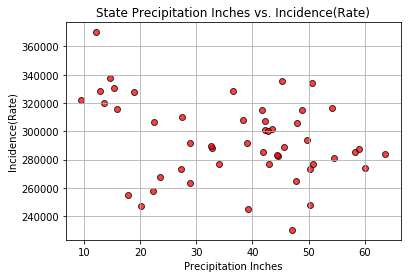

In [6]:
plt.scatter(rainfall_depression_data["Inches"], rainfall_depression_data["Incidence rate"], marker="o",facecolors="red", edgecolors="black",
         alpha=0.75)

plt.title("State Precipitation Inches vs. Incidence(Rate)")
plt.ylabel("Incidence(Rate)")
plt.xlabel("Precipitation Inches")
plt.grid(True)


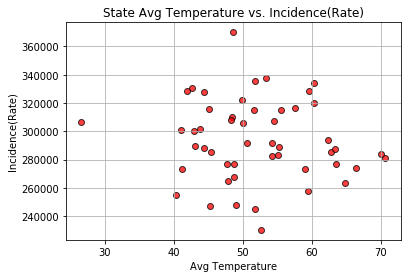

In [10]:
plt.scatter(rainfall_temp_depression["temperature"], rainfall_temp_depression["Incidence rate"], marker="o",facecolors="red", edgecolors="black",
         alpha=0.75)

plt.title("State Avg Temperature vs. Incidence(Rate)")
plt.ylabel("Incidence(Rate)")
plt.xlabel("Avg Temperature")
plt.grid(True)

In [19]:
rainfall_temp_depression_final=rainfall_temp_depression[['State','temperature','Inches']]
rainfall_temp_depression_final.head()
#item_table6=item_table5[['Item ID','Item Name','Purchase Count','Average Purchase Price','Total Purhse Value']]
#item_table6


,State,temperature,Inches
0,Alabama,62.8,58.3
1,Alaska,26.6,22.5
2,Arizona,60.3,13.6
3,Arkansas,60.4,50.6
4,California,59.4,22.2


In [20]:
rainfall_temp_depression_final.corr()

,temperature,Inches
temperature,1.000000,0.544087
Inches,0.544087,1.000000
